In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging
from datetime import datetime
import json

# Configure warnings and logging
warnings.filterwarnings('ignore')
logging.basicConfig(level=logging.INFO)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Import our modular components
import sys
sys.path.append('src')

from utils.data_loader import DataLoader
from utils.text_preprocessor import TextPreprocessor
from sentiment_analysis.sentiment_analyzer import SentimentAnalyzer
from sentiment_analysis.theme_analyzer import ThemeAnalyzer
from visualization.plots import SentimentVisualizer

print("✅ All libraries imported successfully!")
print(f"Analysis started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ All libraries imported successfully!
Analysis started at: 2025-06-15 10:28:09


In [2]:
# Initialize data loader
data_loader = DataLoader()

# Load the reviews data
df = data_loader.load_reviews_data('data/cleaned_reviews.csv')

print(f"📊 Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n" + "="*50)
print("FIRST 5 ROWS:")
print("="*50)
df.head()


INFO:utils.data_loader:Loaded 1137 reviews from data/cleaned_reviews.csv


📊 Dataset loaded successfully!
Shape: (1137, 8)
Columns: ['review', 'rating', 'date', 'bank', 'source', 'review_length', 'word_count', 'processed_at']

FIRST 5 ROWS:


,review,rating,date,bank,source,review_length,word_count,processed_at
0,The CBE app has been highly unreliable in rece...,2,2025-05-25,CBE,Google Play Store,490,77,2025-06-14 10:42:45
1,"this new update(Mar 19,2025) is great in fixin...",4,2025-03-20,CBE,Google Play Store,382,65,2025-06-14 10:42:45
2,Good job to the CBE team on this mobile app! I...,5,2025-04-04,CBE,Google Play Store,341,57,2025-06-14 10:42:45
3,this app has developed in a very good ways but...,5,2025-05-31,CBE,Google Play Store,446,82,2025-06-14 10:42:45
4,everytime you uninstall the app you have to re...,1,2025-06-04,CBE,Google Play Store,319,51,2025-06-14 10:42:45


In [3]:
# Get basic data information
data_info = data_loader.basic_data_info(df)

print("📈 DATASET OVERVIEW:")
print("="*50)
print(f"Total Reviews: {data_info['total_reviews']:,}")
print(f"Banks: {data_info['unique_banks']}")
print(f"Date Range: {data_info['date_range']['min']} to {data_info['date_range']['max']}")
print(f"\n📊 RATING STATISTICS:")
print("="*30)
for key, value in data_info['rating_stats'].items():
    print(f"{key.capitalize()}: {value:.2f}")

print(f"\n🔍 MISSING VALUES:")
print("="*25)
for col, missing in data_info['missing_values'].items():
    if missing > 0:
        print(f"{col}: {missing}")
    
print(f"\n📋 DATA TYPES:")
print("="*20)
for col, dtype in data_info['data_types'].items():
    print(f"{col}: {dtype}")


📈 DATASET OVERVIEW:
Total Reviews: 1,137
Banks: ['CBE', 'BOA', 'Dashen']
Date Range: 2018-11-07 to 2025-06-13

📊 RATING STATISTICS:
Count: 1137.00
Mean: 3.02
Std: 1.76
Min: 1.00
25%: 1.00
50%: 3.00
75%: 5.00
Max: 5.00

🔍 MISSING VALUES:

📋 DATA TYPES:
review: object
rating: int64
date: object
bank: object
source: object
review_length: int64
word_count: int64
processed_at: object


🏦 BANK DISTRIBUTION:
CBE: 400 reviews (35.2%)
BOA: 400 reviews (35.2%)
Dashen: 337 reviews (29.6%)

⭐ RATING DISTRIBUTION:
1 stars: 415 reviews (36.5%)
2 stars: 86 reviews (7.6%)
3 stars: 109 reviews (9.6%)
4 stars: 112 reviews (9.9%)
5 stars: 415 reviews (36.5%)


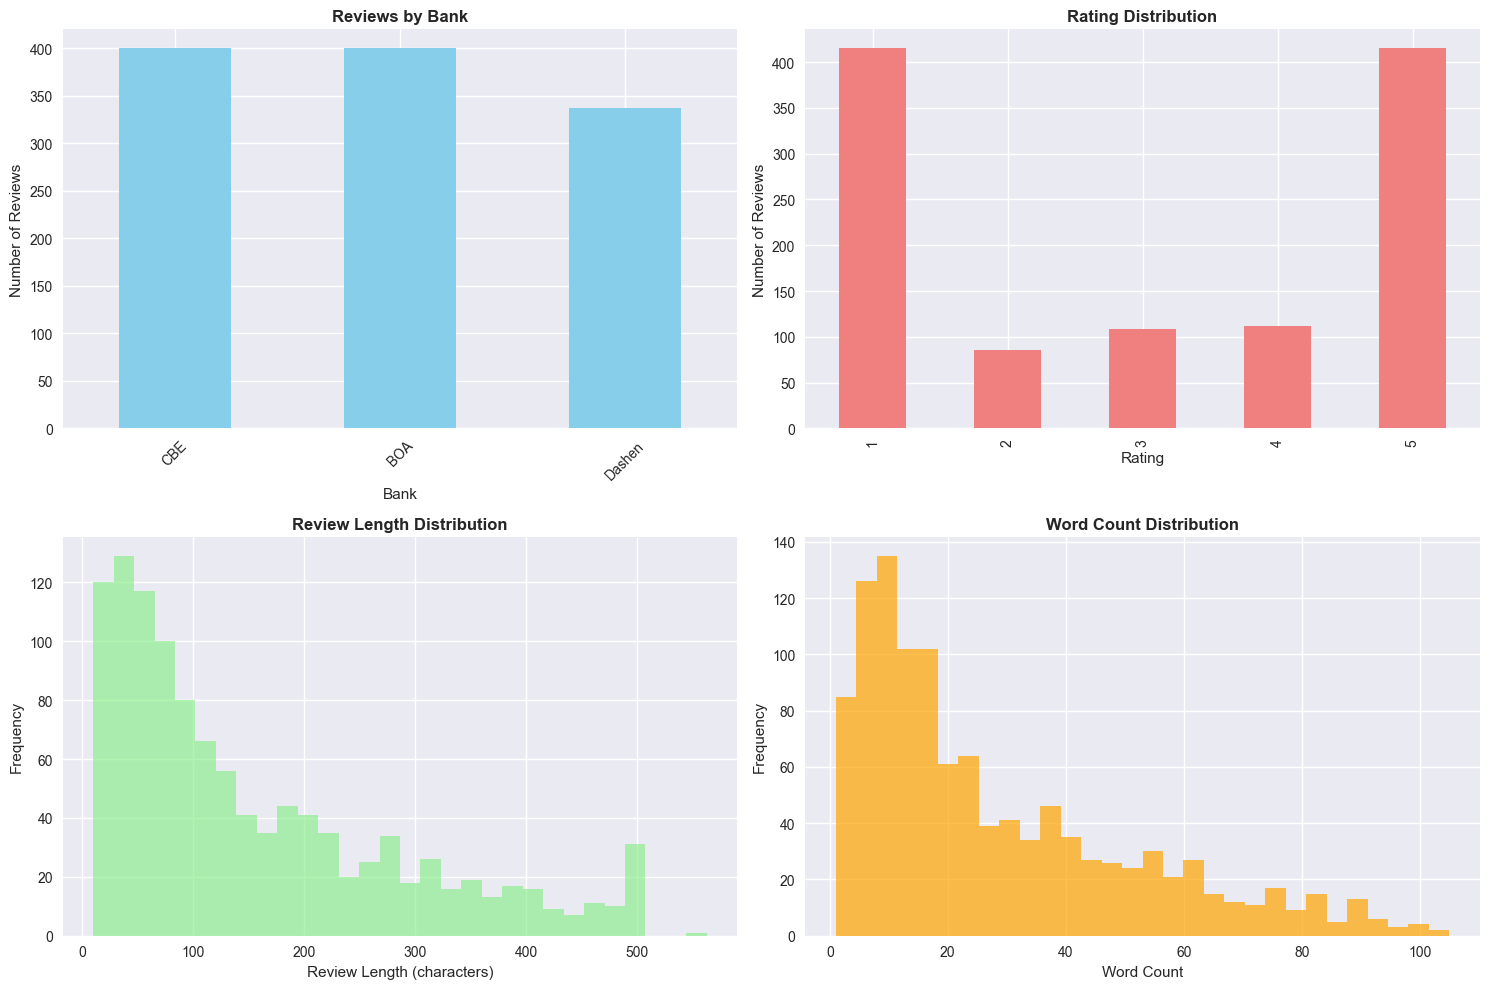

In [4]:
# Distribution analysis
bank_dist = data_loader.get_bank_distribution(df)
rating_dist = data_loader.get_rating_distribution(df)

print("🏦 BANK DISTRIBUTION:")
print("="*30)
for bank, count in bank_dist.items():
    percentage = (count / len(df)) * 100
    print(f"{bank}: {count:,} reviews ({percentage:.1f}%)")

print(f"\n⭐ RATING DISTRIBUTION:")
print("="*30)
for rating, count in rating_dist.items():
    percentage = (count / len(df)) * 100
    print(f"{rating} stars: {count:,} reviews ({percentage:.1f}%)")

# Create initial visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Bank distribution
bank_dist.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Reviews by Bank', fontweight='bold')
ax1.set_xlabel('Bank')
ax1.set_ylabel('Number of Reviews')
ax1.tick_params(axis='x', rotation=45)

# Rating distribution
rating_dist.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Rating Distribution', fontweight='bold')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Number of Reviews')

# Review length distribution
ax3.hist(df['review_length'], bins=30, alpha=0.7, color='lightgreen')
ax3.set_title('Review Length Distribution', fontweight='bold')
ax3.set_xlabel('Review Length (characters)')
ax3.set_ylabel('Frequency')

# Word count distribution
ax4.hist(df['word_count'], bins=30, alpha=0.7, color='orange')
ax4.set_title('Word Count Distribution', fontweight='bold')
ax4.set_xlabel('Word Count')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [5]:
# Initialize text preprocessor
text_preprocessor = TextPreprocessor()

# Clean the data
df_clean = data_loader.clean_text_data(df, 'review')

print(f"🧹 DATA CLEANING RESULTS:")
print("="*40)
print(f"Original reviews: {len(df):,}")
print(f"After cleaning: {len(df_clean):,}")
print(f"Removed: {len(df) - len(df_clean):,} reviews")

# Show examples of text preprocessing
print(f"\n📝 TEXT PREPROCESSING EXAMPLES:")
print("="*50)

sample_reviews = df_clean['review'].head(3).tolist()
for i, review in enumerate(sample_reviews, 1):
    print(f"\n--- EXAMPLE {i} ---")
    print(f"Original ({len(review)} chars):")
    print(f"'{review[:200]}...' " if len(review) > 200 else f"'{review}'")
    
    cleaned = text_preprocessor.clean_text(review)
    print(f"\nCleaned ({len(cleaned)} chars):")
    print(f"'{cleaned[:200]}...' " if len(cleaned) > 200 else f"'{cleaned}'")
    
    processed = text_preprocessor.preprocess_text(review)
    print(f"\nFully Processed ({len(processed)} chars):")
    print(f"'{processed[:200]}...' " if len(processed) > 200 else f"'{processed}'")


INFO:utils.data_loader:Cleaned data: 1137 reviews remaining


🧹 DATA CLEANING RESULTS:
Original reviews: 1,137
After cleaning: 1,137
Removed: 0 reviews

📝 TEXT PREPROCESSING EXAMPLES:

--- EXAMPLE 1 ---
Original (490 chars):
'The CBE app has been highly unreliable in recent weeks. It frequently fails to work properly on both Ethio Telecom and Safaricom networks, whether using Wi-Fi or mobile data. This week, the system was...' 

Cleaned (478 chars):
'the cbe app has been highly unreliable in recent weeks it frequently fails to work properly on both ethio telecom and safaricom networks whether using wifi or mobile data this week the system was down...' 

Fully Processed (340 chars):
'cbe app highly unreliable recent week frequently fails work properly ethio telecom safaricom network whether using wifi mobile data week system entirely extended period making difficult access banking...' 

--- EXAMPLE 2 ---
Original (382 chars):
'this new update(Mar 19,2025) is great in fixing bugs, stability and smooth experience I'll give u that but it came with a 

In [6]:
# Initialize sentiment analyzer
sentiment_analyzer = SentimentAnalyzer()

print("🤖 SENTIMENT ANALYZER INITIALIZED")
print("="*50)
print(f"Model: {sentiment_analyzer.model_name}")
print(f"Pipeline available: {sentiment_analyzer.sentiment_pipeline is not None}")

# Test sentiment analysis on a few examples
print(f"\n🧪 TESTING SENTIMENT ANALYSIS:")
print("="*40)

test_reviews = [
    "This app is amazing! Very easy to use and fast transactions.",
    "The app keeps crashing and is very slow. Terrible experience.",
    "It's okay, nothing special but works fine for basic banking."
]

for i, review in enumerate(test_reviews, 1):
    print(f"\n--- TEST {i} ---")
    print(f"Review: '{review}'")
    
    # Analyze with DistilBERT
    result = sentiment_analyzer.analyze_sentiment_distilbert(review)
    print(f"DistilBERT Result:")
    print(f"  Sentiment: {result['sentiment']} (confidence: {result['confidence']:.3f})")
    print(f"  Scores - Positive: {result['positive']:.3f}, Negative: {result['negative']:.3f}, Neutral: {result['neutral']:.3f}")
    
    # Also test TextBlob for comparison
    textblob_result = sentiment_analyzer.analyze_sentiment_textblob(review)
    print(f"TextBlob Result:")
    print(f"  Sentiment: {textblob_result['sentiment']} (confidence: {textblob_result['confidence']:.3f})")
    print(f"  Polarity: {textblob_result['polarity']:.3f}, Subjectivity: {textblob_result['subjectivity']:.3f}")


🤖 SENTIMENT ANALYZER INITIALIZED
Model: distilbert-base-uncased-finetuned-sst-2-english
Pipeline available: False

🧪 TESTING SENTIMENT ANALYSIS:

--- TEST 1 ---
Review: 'This app is amazing! Very easy to use and fast transactions.'
DistilBERT Result:
  Sentiment: positive (confidence: 0.752)
  Scores - Positive: 0.752, Negative: 0.248, Neutral: 0.100
TextBlob Result:
  Sentiment: positive (confidence: 0.752)
  Polarity: 0.504, Subjectivity: 0.833

--- TEST 2 ---
Review: 'The app keeps crashing and is very slow. Terrible experience.'
DistilBERT Result:
  Sentiment: negative (confidence: 0.848)
  Scores - Positive: 0.152, Negative: 0.848, Neutral: 0.100
TextBlob Result:
  Sentiment: negative (confidence: 0.848)
  Polarity: -0.695, Subjectivity: 0.760

--- TEST 3 ---
Review: 'It's okay, nothing special but works fine for basic banking.'
DistilBERT Result:
  Sentiment: positive (confidence: 0.659)
  Scores - Positive: 0.659, Negative: 0.341, Neutral: 0.100
TextBlob Result:
  Sentiment: pos

In [7]:
# Perform sentiment analysis on the entire dataset
print("🔄 ANALYZING SENTIMENT FOR ALL REVIEWS...")
print("="*50)
print("This may take a few minutes depending on your system...")

# Analyze sentiment for all reviews
df_sentiment = sentiment_analyzer.analyze_dataframe(df_clean, 'review')

print(f"✅ SENTIMENT ANALYSIS COMPLETED!")
print(f"Processed {len(df_sentiment):,} reviews")

# Display first few results
print(f"\n📊 FIRST 5 SENTIMENT RESULTS:")
print("="*40)
sentiment_cols = ['review', 'sentiment_sentiment', 'sentiment_confidence', 'sentiment_positive', 'sentiment_negative', 'sentiment_neutral']
display_df = df_sentiment[sentiment_cols].head()
display_df


INFO:sentiment_analysis.sentiment_analyzer:Processing text 1/1137


🔄 ANALYZING SENTIMENT FOR ALL REVIEWS...
This may take a few minutes depending on your system...


INFO:sentiment_analysis.sentiment_analyzer:Processing text 101/1137
INFO:sentiment_analysis.sentiment_analyzer:Processing text 201/1137
INFO:sentiment_analysis.sentiment_analyzer:Processing text 301/1137
INFO:sentiment_analysis.sentiment_analyzer:Processing text 401/1137
INFO:sentiment_analysis.sentiment_analyzer:Processing text 501/1137
INFO:sentiment_analysis.sentiment_analyzer:Processing text 601/1137
INFO:sentiment_analysis.sentiment_analyzer:Processing text 701/1137
INFO:sentiment_analysis.sentiment_analyzer:Processing text 801/1137
INFO:sentiment_analysis.sentiment_analyzer:Processing text 901/1137
INFO:sentiment_analysis.sentiment_analyzer:Processing text 1001/1137
INFO:sentiment_analysis.sentiment_analyzer:Processing text 1101/1137


✅ SENTIMENT ANALYSIS COMPLETED!
Processed 1,137 reviews

📊 FIRST 5 SENTIMENT RESULTS:


,review,sentiment_sentiment,sentiment_confidence,sentiment_positive,sentiment_negative,sentiment_neutral
0,The CBE app has been highly unreliable in rece...,negative,0.570253,0.429747,0.570253,0.1
1,"this new update(Mar 19,2025) is great in fixin...",positive,0.628030,0.628030,0.371970,0.1
2,Good job to the CBE team on this mobile app! I...,positive,0.659722,0.659722,0.340278,0.1
3,this app has developed in a very good ways but...,positive,0.610741,0.610741,0.389259,0.1
4,everytime you uninstall the app you have to re...,positive,0.617083,0.617083,0.382917,0.1


In [8]:
# Get sentiment summary statistics
sentiment_summary = sentiment_analyzer.get_sentiment_summary(df_sentiment)

print("📈 SENTIMENT ANALYSIS SUMMARY:")
print("="*50)
print(f"Total Reviews Analyzed: {sentiment_summary['total_reviews']:,}")

print(f"\n🎯 SENTIMENT DISTRIBUTION:")
print("="*35)
for sentiment, count in sentiment_summary['sentiment_distribution'].items():
    percentage = sentiment_summary['sentiment_percentages'][sentiment]
    print(f"{sentiment.capitalize()}: {count:,} reviews ({percentage:.1f}%)")

print(f"\n📊 AVERAGE SCORES:")
print("="*25)
for sentiment, score in sentiment_summary['average_scores'].items():
    print(f"{sentiment.capitalize()}: {score:.3f}")

print(f"\n🎯 AVERAGE CONFIDENCE: {sentiment_summary['average_confidence']:.3f}")

if 'polarity_stats' in sentiment_summary:
    print(f"\n📈 POLARITY STATISTICS:")
    print("="*30)
    for stat, value in sentiment_summary['polarity_stats'].items():
        print(f"{stat.capitalize()}: {value:.3f}")


📈 SENTIMENT ANALYSIS SUMMARY:
Total Reviews Analyzed: 1,137

🎯 SENTIMENT DISTRIBUTION:
Positive: 591 reviews (52.0%)
Negative: 201 reviews (17.7%)
Neutral: 345 reviews (30.3%)

📊 AVERAGE SCORES:
Positive: 0.455
Negative: 0.302
Neutral: 0.312

🎯 AVERAGE CONFIDENCE: 0.731

📈 POLARITY STATISTICS:
Mean: 0.155
Std: 0.359
Min: -1.000
Max: 1.000


📊 Creating Sentiment Distribution Plots...


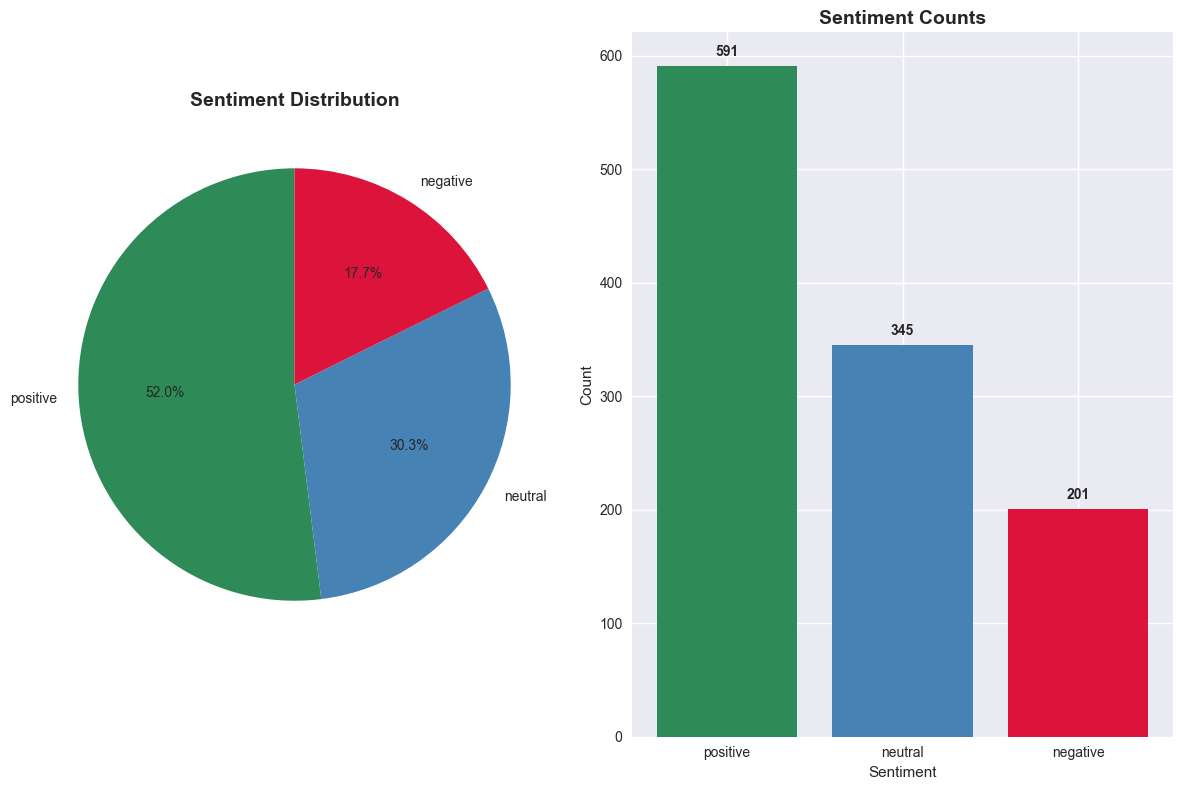


🏦 Creating Bank Sentiment Comparison...


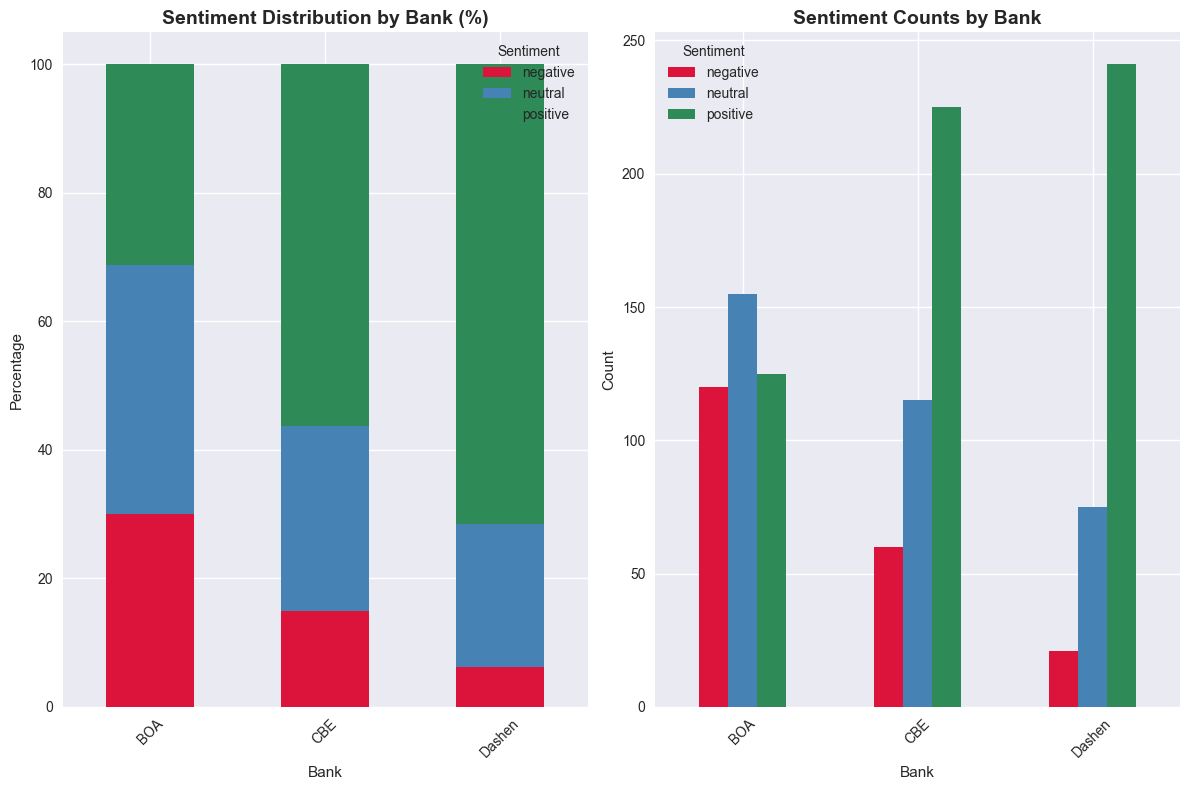


⭐ Creating Rating-Sentiment Correlation...


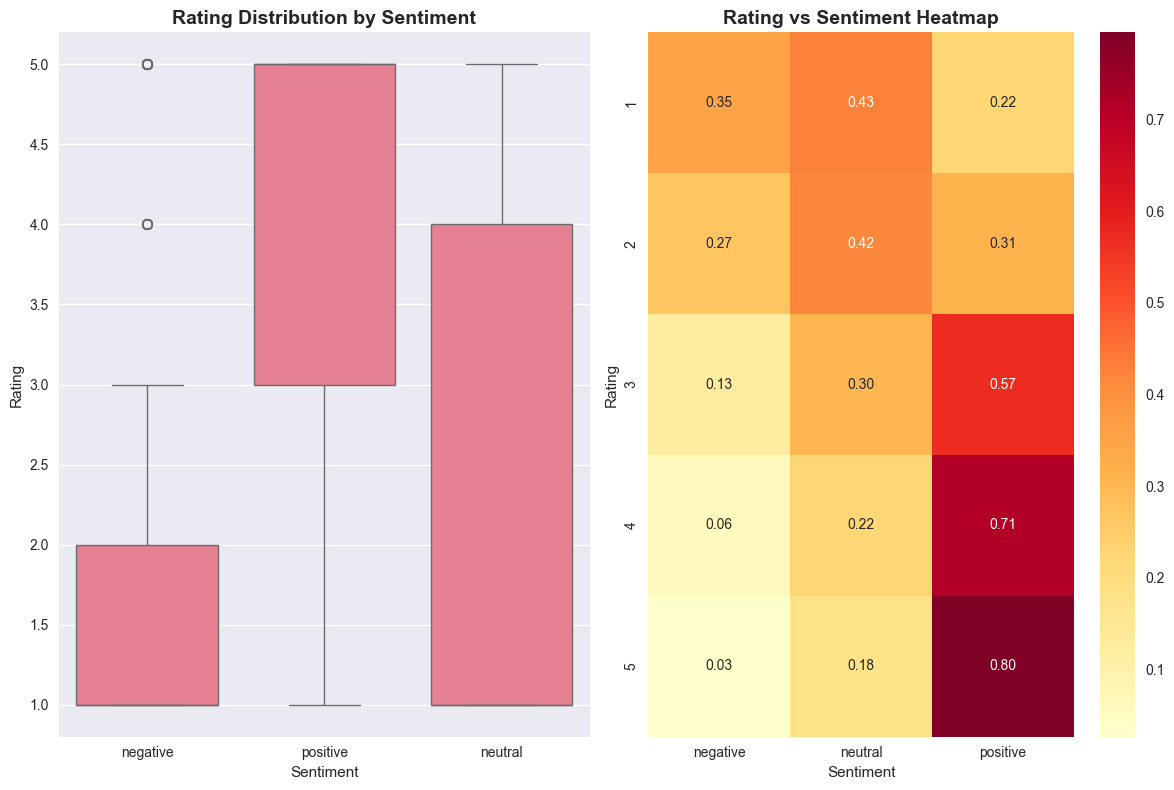


🎯 Creating Confidence Distribution...


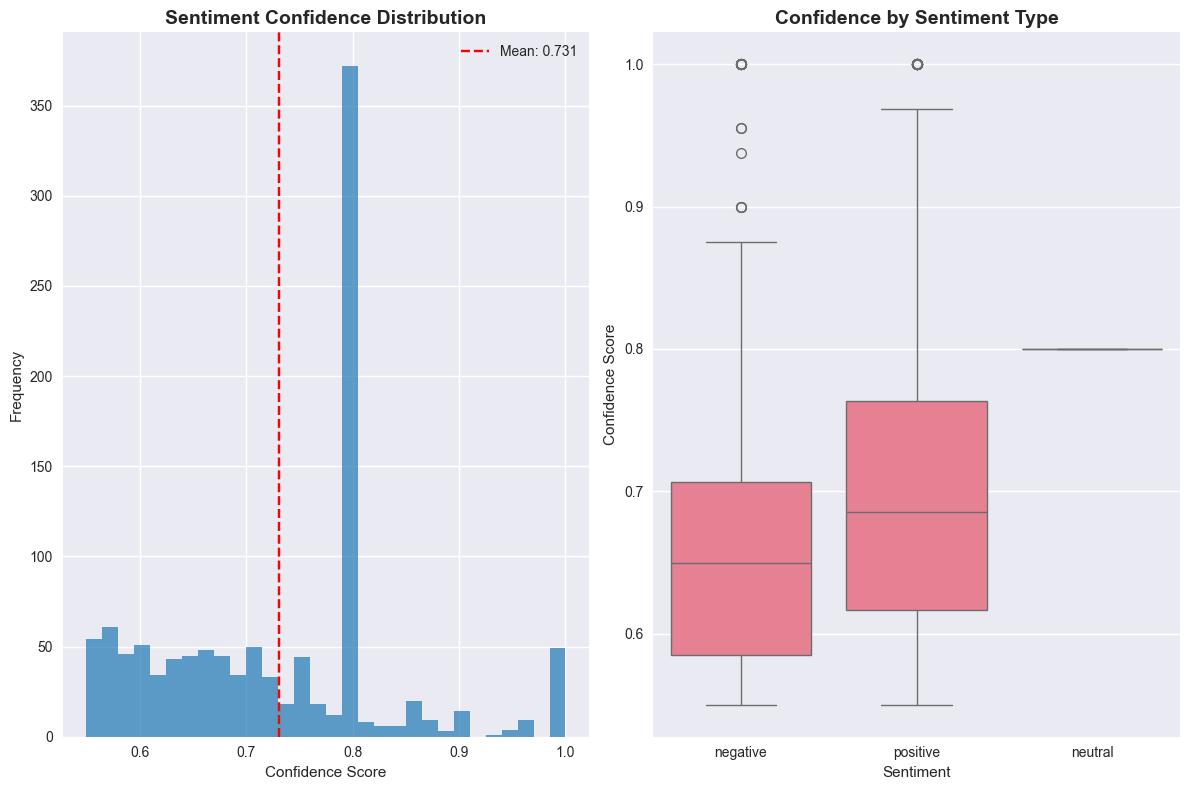

In [9]:
# Initialize visualizer
visualizer = SentimentVisualizer()

# 1. Overall Sentiment Distribution
print("📊 Creating Sentiment Distribution Plots...")
fig1 = visualizer.plot_sentiment_distribution(df_sentiment)
plt.show()

# 2. Bank-wise Sentiment Comparison
print("\n🏦 Creating Bank Sentiment Comparison...")
fig2 = visualizer.plot_bank_sentiment_comparison(df_sentiment)
plt.show()

# 3. Rating-Sentiment Correlation
print("\n⭐ Creating Rating-Sentiment Correlation...")
fig3 = visualizer.plot_rating_sentiment_correlation(df_sentiment)
plt.show()

# 4. Sentiment Confidence Distribution
print("\n🎯 Creating Confidence Distribution...")
fig4 = visualizer.plot_sentiment_confidence_distribution(df_sentiment)
plt.show()


In [10]:
# Initialize theme analyzer
theme_analyzer = ThemeAnalyzer()

print("🔍 THEME ANALYZER INITIALIZED")
print("="*50)
print("Available themes:")
for i, theme in enumerate(theme_analyzer.theme_keywords.keys(), 1):
    print(f"{i}. {theme.replace('_', ' ')}")

# Test theme analysis on sample reviews
print(f"\n🧪 TESTING THEME ANALYSIS:")
print("="*40)

sample_reviews_for_themes = [
    "The app interface is confusing and hard to navigate. The design needs improvement.",
    "Transaction failed multiple times. Money was deducted but transfer didn't complete.",
    "App is very slow and keeps crashing. Performance is terrible.",
    "Great security features with fingerprint login. Feel safe using this app."
]

for i, review in enumerate(sample_reviews_for_themes, 1):
    print(f"\n--- EXAMPLE {i} ---")
    print(f"Review: '{review}'")
    themes = theme_analyzer.identify_themes(review)
    print(f"Identified Themes: {themes if themes else 'None'}")


🔍 THEME ANALYZER INITIALIZED
Available themes:
1. UI UX Issues
2. Performance Issues
3. Transaction Issues
4. Security Features
5. Network Connectivity
6. Customer Support
7. Feature Requests
8. Account Access

🧪 TESTING THEME ANALYSIS:

--- EXAMPLE 1 ---
Review: 'The app interface is confusing and hard to navigate. The design needs improvement.'
Identified Themes: ['UI_UX_Issues', 'Feature_Requests']

--- EXAMPLE 2 ---
Review: 'Transaction failed multiple times. Money was deducted but transfer didn't complete.'
Identified Themes: ['Transaction_Issues']

--- EXAMPLE 3 ---
Review: 'App is very slow and keeps crashing. Performance is terrible.'
Identified Themes: ['Performance_Issues']

--- EXAMPLE 4 ---
Review: 'Great security features with fingerprint login. Feel safe using this app.'
Identified Themes: ['Security_Features', 'Feature_Requests', 'Account_Access']


In [11]:
# Perform theme analysis on the entire dataset
print("🔄 ANALYZING THEMES FOR ALL REVIEWS...")
print("="*50)
print("This will identify themes in all reviews...")

# Analyze themes for all reviews
df_complete = theme_analyzer.analyze_dataframe(df_sentiment, 'review')

print(f"✅ THEME ANALYSIS COMPLETED!")
print(f"Processed {len(df_complete):,} reviews")

# Display first few results with themes
print(f"\n📊 FIRST 5 THEME RESULTS:")
print("="*40)
theme_cols = ['review', 'themes', 'theme_count']
display_theme_df = df_complete[theme_cols].head()
display_theme_df


INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 1/1137
INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 101/1137
INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 201/1137


🔄 ANALYZING THEMES FOR ALL REVIEWS...
This will identify themes in all reviews...


INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 301/1137
INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 401/1137
INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 501/1137
INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 601/1137
INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 701/1137
INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 801/1137
INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 901/1137
INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 1001/1137
INFO:sentiment_analysis.theme_analyzer:Processing theme analysis 1101/1137


✅ THEME ANALYSIS COMPLETED!
Processed 1,137 reviews

📊 FIRST 5 THEME RESULTS:


,review,themes,theme_count
0,The CBE app has been highly unreliable in rece...,"UI_UX_Issues, Network_Connectivity, Customer_S...",5
1,"this new update(Mar 19,2025) is great in fixin...","UI_UX_Issues, Transaction_Issues, Security_Fea...",4
2,Good job to the CBE team on this mobile app! I...,"UI_UX_Issues, Feature_Requests",2
3,this app has developed in a very good ways but...,"UI_UX_Issues, Performance_Issues, Transaction_...",5
4,everytime you uninstall the app you have to re...,Security_Features,1


In [12]:
# Get theme summary statistics
theme_summary = theme_analyzer.get_theme_summary(df_complete)

print("📈 THEME ANALYSIS SUMMARY:")
print("="*50)
print(f"Total Reviews Analyzed: {theme_summary['total_reviews']:,}")
print(f"Reviews with Themes: {theme_summary['reviews_with_themes']:,}")
print(f"Average Themes per Review: {theme_summary['average_themes_per_review']:.2f}")

print(f"\n🎯 THEME DISTRIBUTION:")
print("="*35)
for theme, count in theme_summary['theme_counts'].items():
    percentage = theme_summary['theme_percentages'][theme]
    print(f"{theme.replace('_', ' ')}: {count:,} reviews ({percentage:.1f}%)")

print(f"\n🏆 TOP 5 MOST COMMON THEMES:")
print("="*40)
for i, (theme, count) in enumerate(theme_summary['most_common_themes'], 1):
    percentage = (count / theme_summary['total_reviews']) * 100
    print(f"{i}. {theme.replace('_', ' ')}: {count:,} reviews ({percentage:.1f}%)")


📈 THEME ANALYSIS SUMMARY:
Total Reviews Analyzed: 1,137
Reviews with Themes: 841
Average Themes per Review: 1.67

🎯 THEME DISTRIBUTION:
UI UX Issues: 281 reviews (24.7%)
Performance Issues: 293 reviews (25.8%)
Transaction Issues: 348 reviews (30.6%)
Security Features: 149 reviews (13.1%)
Network Connectivity: 128 reviews (11.3%)
Customer Support: 123 reviews (10.8%)
Feature Requests: 393 reviews (34.6%)
Account Access: 186 reviews (16.4%)

🏆 TOP 5 MOST COMMON THEMES:
1. Feature Requests: 393 reviews (34.6%)
2. Transaction Issues: 348 reviews (30.6%)
3. Performance Issues: 293 reviews (25.8%)
4. UI UX Issues: 281 reviews (24.7%)
5. Account Access: 186 reviews (16.4%)


📊 Creating Theme Distribution Plots...


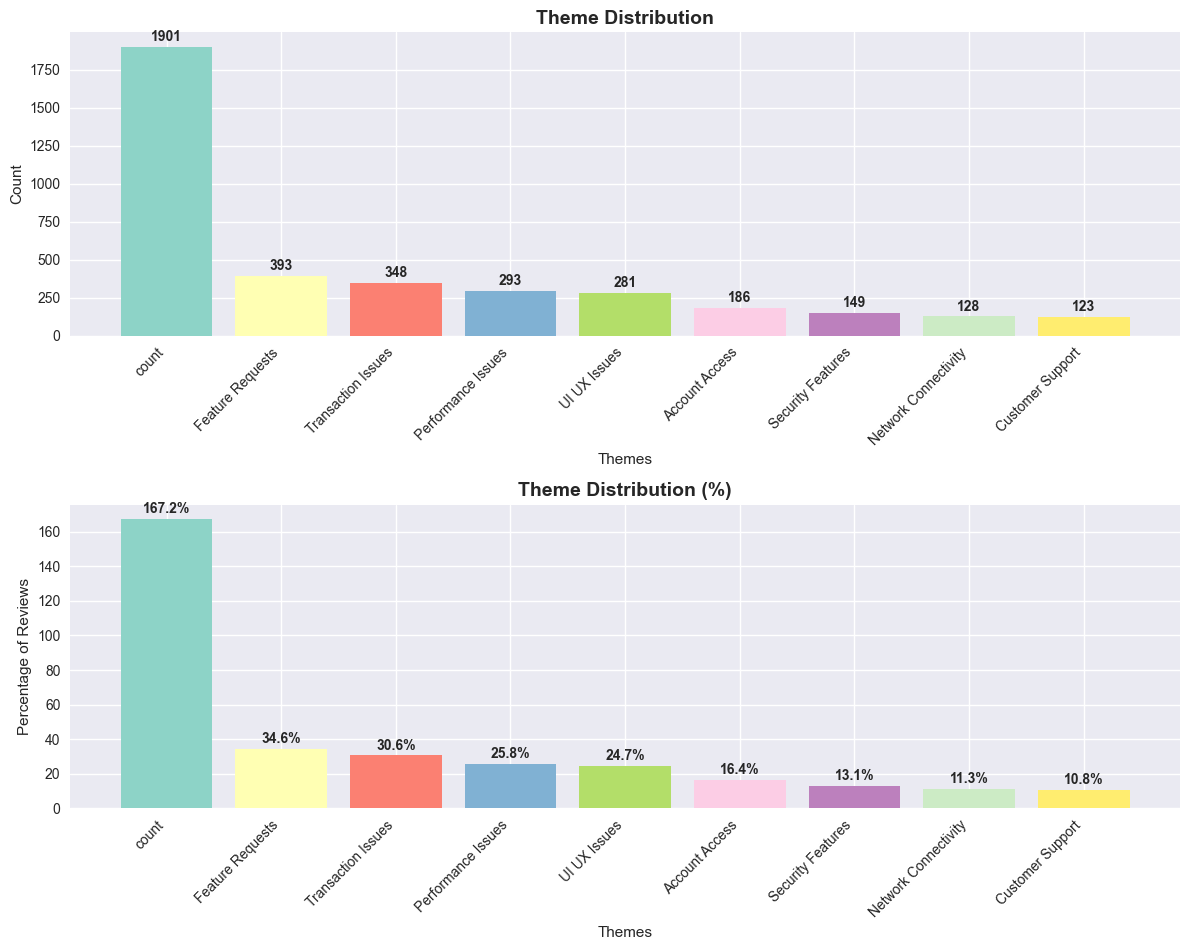


🔥 Creating Theme-Sentiment Heatmap...


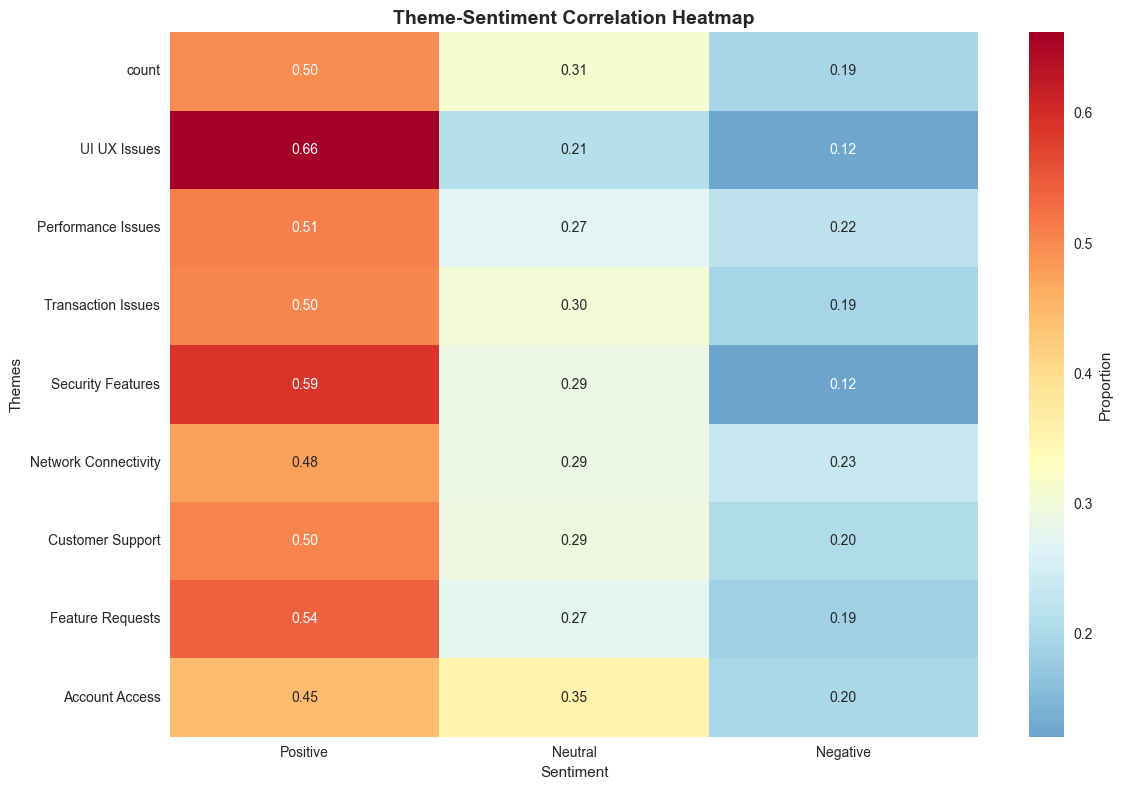


📈 THEME-SENTIMENT CORRELATION ANALYSIS:

🎯 UI UX ISSUES:
   Total Reviews: 281
   Positive: 66.2%
   Neutral:  21.4%
   Negative: 12.5%
   Avg Confidence: 0.699
   Tendency: 😊 Mostly Positive

🎯 PERFORMANCE ISSUES:
   Total Reviews: 293
   Positive: 50.9%
   Neutral:  27.0%
   Negative: 22.2%
   Avg Confidence: 0.693
   Tendency: 😊 Mostly Positive

🎯 TRANSACTION ISSUES:
   Total Reviews: 348
   Positive: 50.3%
   Neutral:  30.5%
   Negative: 19.3%
   Avg Confidence: 0.709
   Tendency: 😊 Mostly Positive

🎯 SECURITY FEATURES:
   Total Reviews: 149
   Positive: 59.1%
   Neutral:  28.9%
   Negative: 12.1%
   Avg Confidence: 0.705
   Tendency: 😊 Mostly Positive

🎯 NETWORK CONNECTIVITY:
   Total Reviews: 128
   Positive: 47.7%
   Neutral:  28.9%
   Negative: 23.4%
   Avg Confidence: 0.688
   Tendency: 😐 Mixed/Neutral

🎯 CUSTOMER SUPPORT:
   Total Reviews: 123
   Positive: 50.4%
   Neutral:  29.3%
   Negative: 20.3%
   Avg Confidence: 0.710
   Tendency: 😊 Mostly Positive

🎯 FEATURE REQUESTS:

In [13]:
# 1. Theme Distribution
print("📊 Creating Theme Distribution Plots...")
fig5 = visualizer.plot_theme_distribution(df_complete)
plt.show()

# 2. Theme-Sentiment Correlation Heatmap
print("\n🔥 Creating Theme-Sentiment Heatmap...")
fig6 = visualizer.plot_theme_sentiment_heatmap(df_complete)
plt.show()

# 3. Detailed theme-sentiment analysis
theme_sentiment_corr = theme_analyzer.get_theme_sentiment_correlation(df_complete)

print("\n📈 THEME-SENTIMENT CORRELATION ANALYSIS:")
print("="*60)
for theme, stats in theme_sentiment_corr.items():
    print(f"\n🎯 {theme.replace('_', ' ').upper()}:")
    print(f"   Total Reviews: {stats['total_reviews']:,}")
    print(f"   Positive: {stats['positive_ratio']:.1%}")
    print(f"   Neutral:  {stats['neutral_ratio']:.1%}")
    print(f"   Negative: {stats['negative_ratio']:.1%}")
    print(f"   Avg Confidence: {stats['avg_confidence']:.3f}")
    
    # Determine theme sentiment tendency
    if stats['positive_ratio'] > 0.5:
        tendency = "😊 Mostly Positive"
    elif stats['negative_ratio'] > 0.5:
        tendency = "😞 Mostly Negative"
    else:
        tendency = "😐 Mixed/Neutral"
    print(f"   Tendency: {tendency}")


In [14]:
# Bank-wise sentiment analysis
bank_sentiment_analysis = {}
bank_theme_analysis = theme_analyzer.get_bank_theme_analysis(df_complete)

print("🏦 BANK-WISE ANALYSIS:")
print("="*60)

for bank in df_complete['bank'].unique():
    bank_df = df_complete[df_complete['bank'] == bank]
    bank_sentiment_summary = sentiment_analyzer.get_sentiment_summary(bank_df)
    
    print(f"\n🏛️  {bank.upper()} BANK:")
    print("="*40)
    print(f"Total Reviews: {len(bank_df):,}")
    print(f"Average Rating: {bank_df['rating'].mean():.2f}")
    
    print(f"\n📊 Sentiment Distribution:")
    for sentiment, count in bank_sentiment_summary['sentiment_distribution'].items():
        percentage = bank_sentiment_summary['sentiment_percentages'][sentiment]
        print(f"   {sentiment.capitalize()}: {count:,} ({percentage:.1f}%)")
    
    print(f"\n🎯 Top 3 Themes:")
    if bank in bank_theme_analysis:
        bank_themes = bank_theme_analysis[bank]['most_common_themes'][:3]
        for i, (theme, count) in enumerate(bank_themes, 1):
            percentage = (count / len(bank_df)) * 100
            print(f"   {i}. {theme.replace('_', ' ')}: {count} ({percentage:.1f}%)")
    
    # Store for comparison
    bank_sentiment_analysis[bank] = bank_sentiment_summary


🏦 BANK-WISE ANALYSIS:

🏛️  CBE BANK:
Total Reviews: 400
Average Rating: 2.88

📊 Sentiment Distribution:
   Positive: 225 (56.2%)
   Negative: 60 (15.0%)
   Neutral: 115 (28.7%)

🎯 Top 3 Themes:
   1. Transaction Issues: 203 (50.7%)
   2. Feature Requests: 193 (48.2%)
   3. UI UX Issues: 140 (35.0%)

🏛️  BOA BANK:
Total Reviews: 400
Average Rating: 2.03

📊 Sentiment Distribution:
   Positive: 125 (31.2%)
   Negative: 120 (30.0%)
   Neutral: 155 (38.8%)

🎯 Top 3 Themes:
   1. Performance Issues: 123 (30.8%)
   2. Feature Requests: 119 (29.8%)
   3. Transaction Issues: 82 (20.5%)

🏛️  DASHEN BANK:
Total Reviews: 337
Average Rating: 4.37

📊 Sentiment Distribution:
   Positive: 241 (71.5%)
   Negative: 21 (6.2%)
   Neutral: 75 (22.3%)

🎯 Top 3 Themes:
   1. Performance Issues: 84 (24.9%)
   2. Feature Requests: 81 (24.0%)
   3. UI UX Issues: 78 (23.1%)



📊 BANK COMPARISON MATRIX:
     Bank  Total_Reviews  Avg_Rating  Positive_%  Negative_%  Neutral_%  \
2  Dashen            337        4.37       71.51        6.23      22.26   
0     CBE            400        2.88       56.25       15.00      28.75   
1     BOA            400        2.03       31.25       30.00      38.75   

   Avg_Confidence  
2            0.75  
0            0.71  
1            0.74  


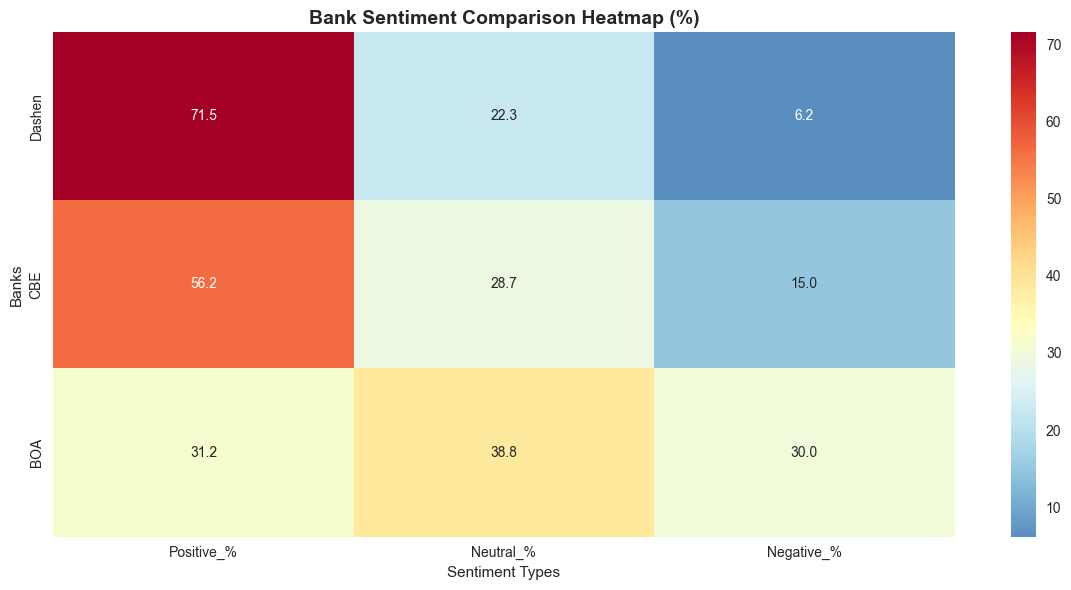

In [15]:
# Create bank comparison visualization
print("\n📊 BANK COMPARISON MATRIX:")
print("="*50)

# Create comparison dataframe
comparison_data = []
for bank, analysis in bank_sentiment_analysis.items():
    bank_df = df_complete[df_complete['bank'] == bank]
    comparison_data.append({
        'Bank': bank,
        'Total_Reviews': analysis['total_reviews'],
        'Avg_Rating': bank_df['rating'].mean(),
        'Positive_%': analysis['sentiment_percentages']['positive'],
        'Negative_%': analysis['sentiment_percentages']['negative'],
        'Neutral_%': analysis['sentiment_percentages']['neutral'],
        'Avg_Confidence': analysis['average_confidence']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Positive_%', ascending=False)

print(comparison_df.round(2))

# Create heatmap for bank comparison
plt.figure(figsize=(12, 6))
comparison_matrix = comparison_df.set_index('Bank')[['Positive_%', 'Neutral_%', 'Negative_%']]
sns.heatmap(comparison_matrix, annot=True, fmt='.1f', cmap='RdYlBu_r', center=33.33)
plt.title('Bank Sentiment Comparison Heatmap (%)', fontweight='bold', fontsize=14)
plt.ylabel('Banks')
plt.xlabel('Sentiment Types')
plt.tight_layout()
plt.show()


🎨 Creating Comprehensive Analysis Dashboard...


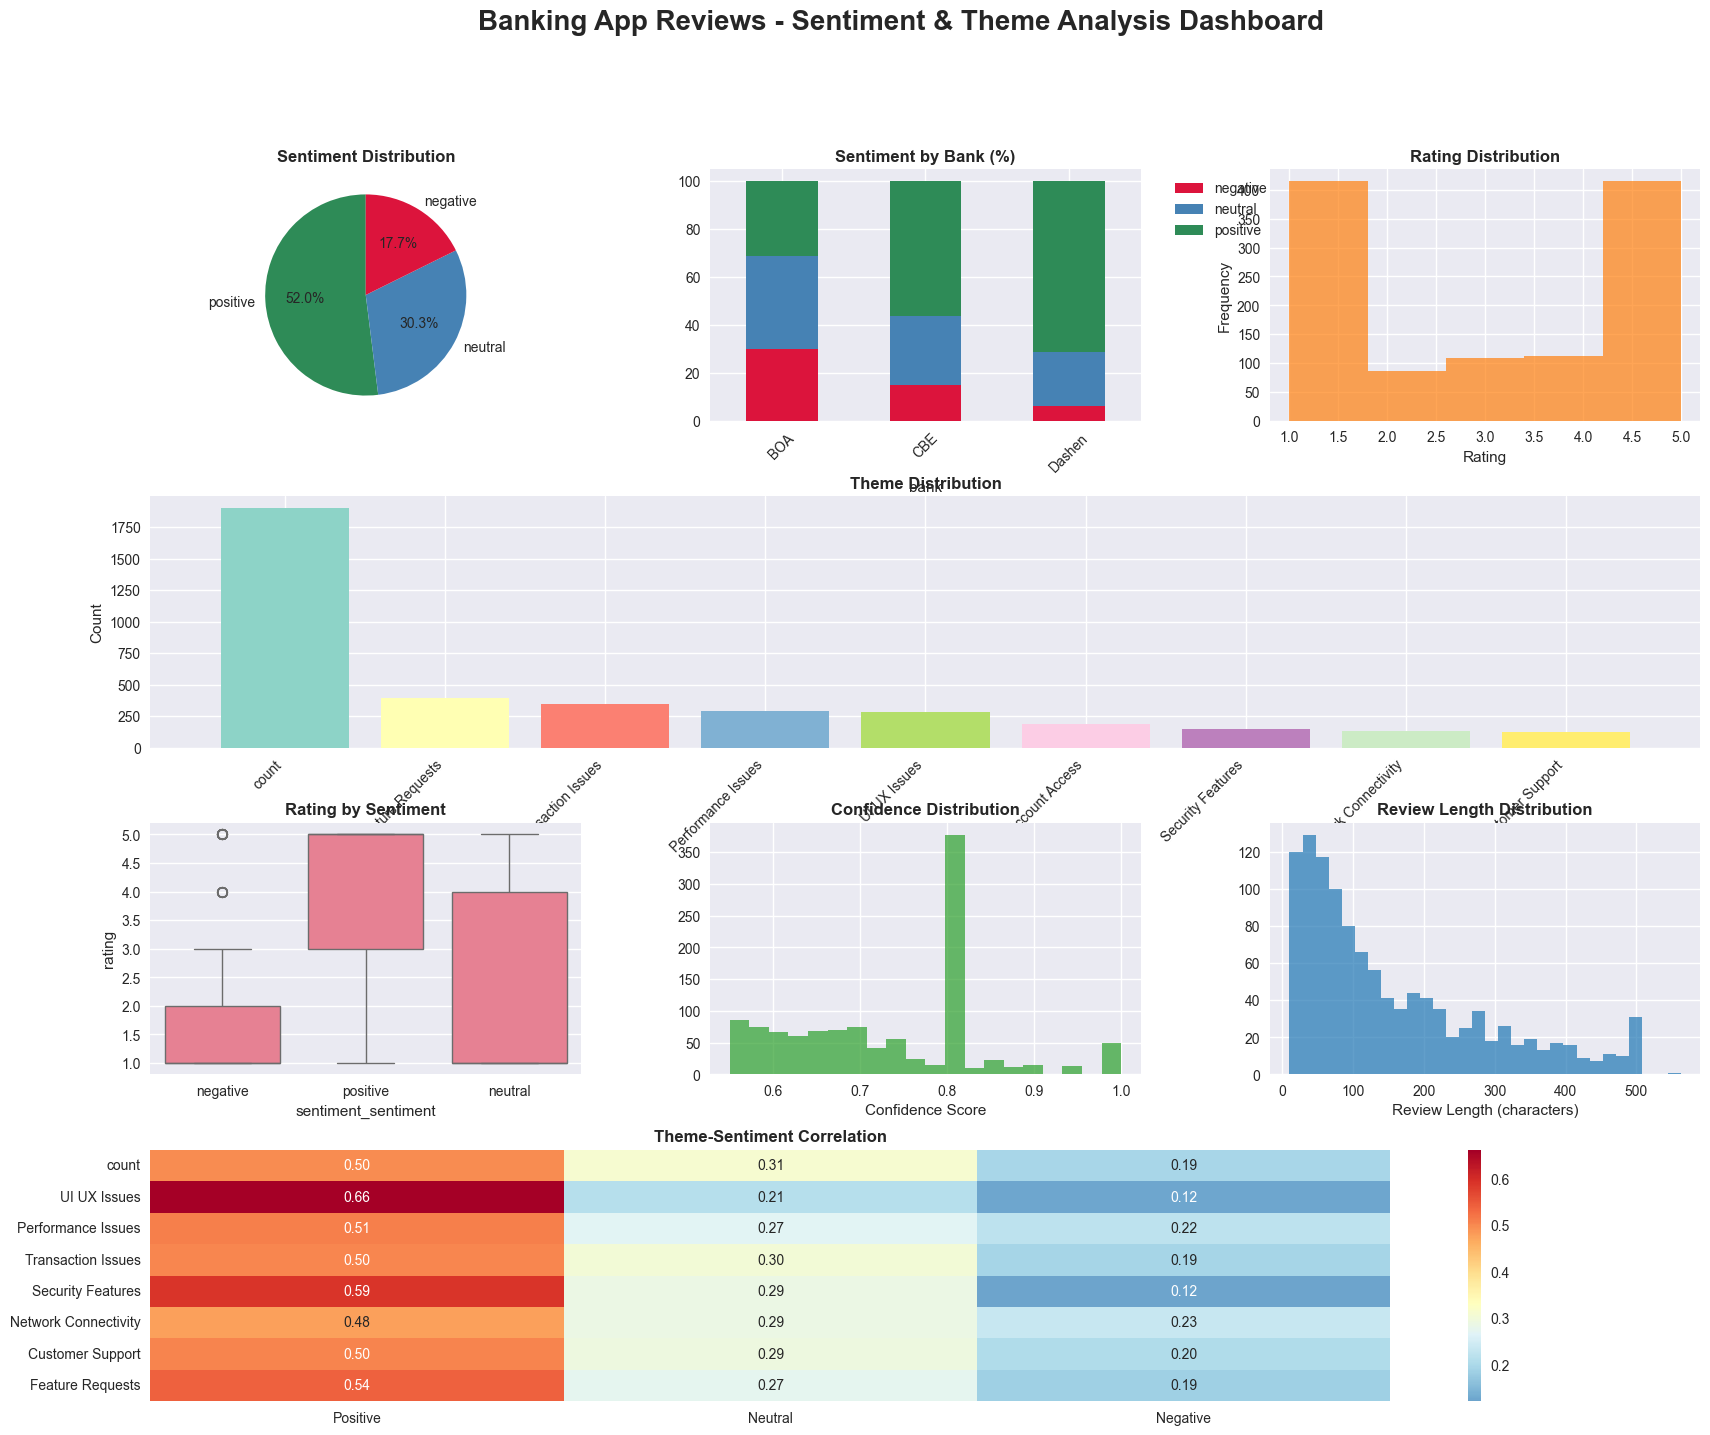

✅ Dashboard created successfully!


In [16]:
# Create comprehensive dashboard
print("🎨 Creating Comprehensive Analysis Dashboard...")
print("="*60)

dashboard_fig = visualizer.create_comprehensive_dashboard(df_complete)
plt.show()

print("✅ Dashboard created successfully!")


In [17]:
# Generate insights and recommendations
insights = {
    "overall_sentiment": sentiment_summary,
    "theme_analysis": theme_summary,
    "bank_comparison": comparison_df.to_dict('records'),
    "theme_sentiment_correlation": theme_sentiment_corr
}

print("🎯 KEY INSIGHTS & RECOMMENDATIONS:")
print("="*70)

print("\n📊 OVERALL FINDINGS:")
print("-" * 30)
total_reviews = sentiment_summary['total_reviews']
positive_pct = sentiment_summary['sentiment_percentages']['positive']
negative_pct = sentiment_summary['sentiment_percentages']['negative']

print(f"• Analyzed {total_reviews:,} Ethiopian banking app reviews")
print(f"• Overall sentiment: {positive_pct:.1f}% positive, {negative_pct:.1f}% negative")
print(f"• Average confidence score: {sentiment_summary['average_confidence']:.3f}")

print("\n🏆 BANK PERFORMANCE RANKING:")
print("-" * 35)
for i, bank_data in enumerate(comparison_df.to_dict('records'), 1):
    print(f"{i}. {bank_data['Bank']}: {bank_data['Positive_%']:.1f}% positive (Rating: {bank_data['Avg_Rating']:.2f})")

print("\n🔍 TOP ISSUES (Most Common Negative Themes):")
print("-" * 50)
negative_themes = []
for theme, stats in theme_sentiment_corr.items():
    if stats['negative_ratio'] > 0.4:  # Themes with >40% negative sentiment
        negative_themes.append((theme, stats['negative_ratio'], stats['total_reviews']))

negative_themes.sort(key=lambda x: x[2], reverse=True)  # Sort by frequency
for i, (theme, neg_ratio, count) in enumerate(negative_themes[:5], 1):
    print(f"{i}. {theme.replace('_', ' ')}: {neg_ratio:.1%} negative ({count:,} reviews)")

print("\n💡 RECOMMENDATIONS:")
print("-" * 25)
print("1. 🎨 UI/UX Improvements: Focus on interface design and navigation")
print("2. ⚡ Performance Optimization: Address app speed and stability issues")
print("3. 💳 Transaction Reliability: Improve transaction success rates")
print("4. 🏦 Bank-Specific Actions:")
for bank_data in comparison_df.to_dict('records'):
    if bank_data['Positive_%'] < 50:
        print(f"   • {bank_data['Bank']}: Priority focus needed (only {bank_data['Positive_%']:.1f}% positive)")

print("\n📈 SUCCESS FACTORS:")
print("-" * 25)
positive_themes = []
for theme, stats in theme_sentiment_corr.items():
    if stats['positive_ratio'] > 0.6:  # Themes with >60% positive sentiment
        positive_themes.append((theme, stats['positive_ratio'], stats['total_reviews']))

positive_themes.sort(key=lambda x: x[1], reverse=True)  # Sort by positive ratio
for i, (theme, pos_ratio, count) in enumerate(positive_themes[:3], 1):
    print(f"{i}. {theme.replace('_', ' ')}: {pos_ratio:.1%} positive - leverage this strength")


🎯 KEY INSIGHTS & RECOMMENDATIONS:

📊 OVERALL FINDINGS:
------------------------------
• Analyzed 1,137 Ethiopian banking app reviews
• Overall sentiment: 52.0% positive, 17.7% negative
• Average confidence score: 0.731

🏆 BANK PERFORMANCE RANKING:
-----------------------------------
1. Dashen: 71.5% positive (Rating: 4.37)
2. CBE: 56.2% positive (Rating: 2.88)
3. BOA: 31.2% positive (Rating: 2.03)

🔍 TOP ISSUES (Most Common Negative Themes):
--------------------------------------------------

💡 RECOMMENDATIONS:
-------------------------
1. 🎨 UI/UX Improvements: Focus on interface design and navigation
2. ⚡ Performance Optimization: Address app speed and stability issues
3. 💳 Transaction Reliability: Improve transaction success rates
4. 🏦 Bank-Specific Actions:
   • BOA: Priority focus needed (only 31.2% positive)

📈 SUCCESS FACTORS:
-------------------------
1. UI UX Issues: 66.2% positive - leverage this strength


In [18]:
# Save results
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Save complete analysis dataframe
output_file = f'task2_sentiment_thematic_analysis_interactive_{timestamp}.csv'
df_complete.to_csv(output_file, index=False)
print(f"💾 Complete analysis saved to: {output_file}")

# Save insights as JSON
insights_file = f'insights_interactive_{timestamp}.json'
with open(insights_file, 'w') as f:
    # Convert numpy types to native Python types for JSON serialization
    insights_json = json.loads(json.dumps(insights, default=str))
    json.dump(insights_json, f, indent=2)
print(f"💾 Insights saved to: {insights_file}")

# Save bank comparison
comparison_file = f'bank_comparison_{timestamp}.csv'
comparison_df.to_csv(comparison_file, index=False)
print(f"💾 Bank comparison saved to: {comparison_file}")

print(f"\n✅ ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)
print(f"📊 Total Reviews Processed: {len(df_complete):,}")
print(f"🎯 Sentiment Analysis: ✅ Complete")
print(f"🔍 Theme Analysis: ✅ Complete")
print(f"📈 Visualizations: ✅ Complete")
print(f"🏦 Bank Comparison: ✅ Complete")
print(f"💡 Insights Generated: ✅ Complete")
print(f"💾 Results Saved: ✅ Complete")
print(f"\nAnalysis completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


💾 Complete analysis saved to: task2_sentiment_thematic_analysis_interactive_20250615_102955.csv
💾 Insights saved to: insights_interactive_20250615_102955.json
💾 Bank comparison saved to: bank_comparison_20250615_102955.csv

✅ ANALYSIS COMPLETED SUCCESSFULLY!
📊 Total Reviews Processed: 1,137
🎯 Sentiment Analysis: ✅ Complete
🔍 Theme Analysis: ✅ Complete
📈 Visualizations: ✅ Complete
🏦 Bank Comparison: ✅ Complete
💡 Insights Generated: ✅ Complete
💾 Results Saved: ✅ Complete

Analysis completed at: 2025-06-15 10:29:55
